In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from control.matlab import *
import os

s = tf('s')

matlab_path = r"D:\Junior Year Matlab\Energy Efficient Buildings"

'''
df = pd.read_csv("20210407-AHU6historicaldata.csv")
df = df[df["Date"] == "2/24/2021"]
df.to_csv("2_24_2021.csv", index = False)
'''

df = pd.read_csv("20210224-AHU6PHC-PIDtuning-OL.csv")
df["DateTime"] = df["Date"] + " " + df["Time"]
df["DateTime"] = pd.to_datetime(df["DateTime"])
df = df.drop(["Date","Time"],axis=1)

df.columns = ["Heating (%)", "Reheat (%)", "SAT (deg F)", "SP (\")", "OAT (deg F)", "Loop Out (%)", "DateTime"]
df.head()

,Heating (%),Reheat (%),SAT (deg F),"SP ("")",OAT (deg F),Loop Out (%),DateTime
0,26.095413,0.0,64.493561,65.0,NaN,NaN,2021-02-24 11:55:25
1,25.785400,NaN,65.537300,NaN,NaN,NaN,2021-02-24 11:55:27
2,NaN,NaN,66.556053,NaN,NaN,NaN,2021-02-24 11:55:36
3,25.390419,NaN,NaN,NaN,NaN,NaN,2021-02-24 11:55:37
4,NaN,NaN,67.593552,NaN,NaN,NaN,2021-02-24 11:55:45


In [3]:
ts_start = "2021-02-24 12:35:00"
ts_final = "2021-02-24 12:45:00"
mask = (df['DateTime'] >= ts_start) & (df['DateTime'] <= ts_final)
df_slice = df.loc[mask]

plot_columns = ["Heating (%)", "SAT (deg F)"]

#https://stackoverflow.com/questions/29370057/select-dataframe-rows-between-two-dates

#print(df_slice[["DateTime","Heating (%)"]].dropna())

#print(df_slice["SAT (°F)"].dropna().tolist())
#print(df_slice["Heating (%)"].dropna().tolist()) # goes from 12% to 22%
'''
301 2021-02-24 12:35:16         12.0
302 2021-02-24 12:35:39         22.0
'''
print(df_slice[["DateTime", "Heating (%)"]].dropna().head(100))
print(df_slice[["DateTime", "SAT (deg F)"]].dropna().head(100))


start_heating = df_slice.loc[(df_slice["DateTime"]=="2021-02-24 12:35:16")]["Heating (%)"].tolist()[0]
end_heating = df_slice.loc[(df_slice["DateTime"]=="2021-02-24 12:42:47")]["Heating (%)"].tolist()[0]
start_sat = df_slice.loc[(df_slice["DateTime"]=="2021-02-24 12:35:16")]["SAT (deg F)"].tolist()[0]
end_sat = df_slice.loc[(df_slice["DateTime"]=="2021-02-24 12:43:40")]["SAT (deg F)"].tolist()[0]


sat_63 = 0.63*(end_sat-start_sat)+start_sat


#print(sat_63) #12:38:09 is when sat_63 happens
#elapsed time is 12:38:09 - 12:35:16 (starting) = 2:53 = 173 = tau
#delay = 12:36:42 - 12:35:16 #86 is delay

max_heating = np.max(df_slice["Heating (%)"])
starting_heating = df_slice.loc[(df_slice["DateTime"]=="2021-02-24 12:35:16")]["Heating (%)"].tolist()[0]
max_temperature = np.max(df_slice["SAT (deg F)"])
min_temperature = np.min(df_slice["SAT (deg F)"])


change_in_step = max_heating - starting_heating #10%
change_in_temp = max_temperature - min_temperature

print(f"K: {change_in_temp/(change_in_step/100)}")
print("Delay: 86 seconds")
print("tau: 173 seconds")

               DateTime  Heating (%)
301 2021-02-24 12:35:16         12.0
302 2021-02-24 12:35:39         22.0
308 2021-02-24 12:37:16         22.0
320 2021-02-24 12:39:16         22.0
330 2021-02-24 12:41:16         22.0
335 2021-02-24 12:42:47          5.0
338 2021-02-24 12:43:16          5.0
339 2021-02-24 12:43:19          0.0
               DateTime  SAT (deg F)
301 2021-02-24 12:35:16    63.749809
303 2021-02-24 12:36:30    64.762314
304 2021-02-24 12:36:42    65.806053
305 2021-02-24 12:36:52    66.849800
306 2021-02-24 12:37:02    67.862297
307 2021-02-24 12:37:12    68.862297
308 2021-02-24 12:37:16    68.862297
309 2021-02-24 12:37:23    69.874794
311 2021-02-24 12:37:34    70.906036
312 2021-02-24 12:37:47    71.918533
313 2021-02-24 12:38:01    72.931038
315 2021-02-24 12:38:17    73.949783
316 2021-02-24 12:38:36    74.974777
318 2021-02-24 12:38:55    75.987274
320 2021-02-24 12:39:16    75.987274
321 2021-02-24 12:39:18    76.987274
323 2021-02-24 12:39:48    77.987274
3

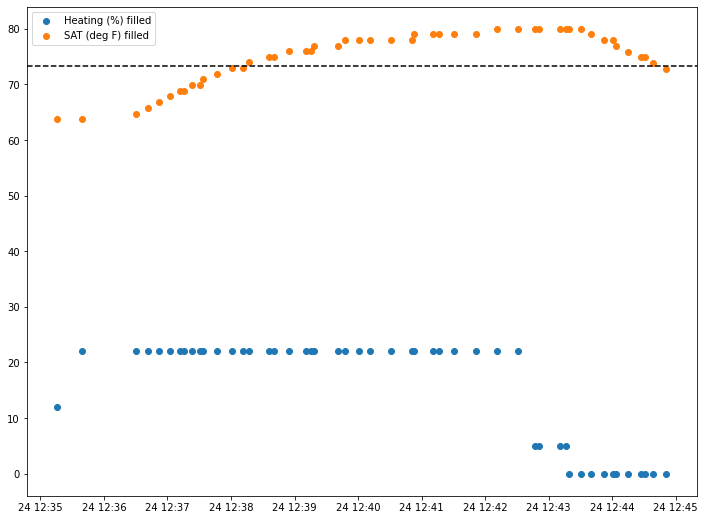

In [146]:
plt.figure(figsize=(12,9))
for i in plot_columns:
    if i not in ["DateTime"]:
        #plt.plot(df_slice["DateTime"],df_slice[i],label=i)
        plt.scatter(df_slice["DateTime"],df_slice[i].ffill(),label=i + " filled")
        #plt.plot(df_slice["DateTime"],df_slice[i].ffill(),label=i + " filled")

plt.legend(loc=2)
plt.axhline(y=sat_63, color='k', linestyle='--')

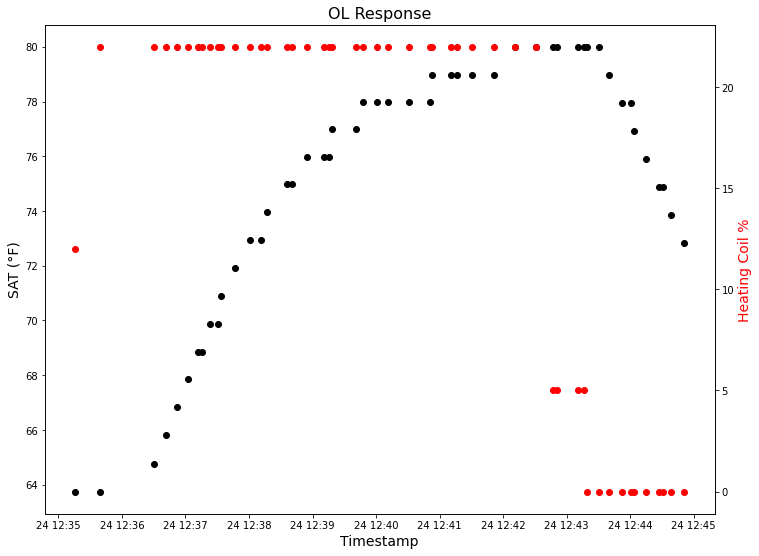

In [145]:
fig,ax = plt.subplots(figsize=(12,9))
ax.set_title('OL Response', fontsize=16)# make a plot
ax.scatter(df_slice["DateTime"], df_slice["SAT (deg F)"].ffill(), color="black", marker="o")
# set x-axis label
ax.set_xlabel("Timestamp",fontsize=14)
# set y-axis label
ax.set_ylabel("SAT (°F)",color="black",fontsize=14)

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.scatter(df_slice["DateTime"], df_slice["Heating (%)"].ffill(), color="red", marker="o")
ax2.set_ylabel("Heating Coil %",color="red",fontsize=14)
plt.show()

In [28]:
df_slice.head()

df_export = df_slice[["DateTime","SAT (deg F)"]]
df_export = df_export.dropna()
# https://stackoverflow.com/a/48129380
df_export["Seconds"] = (df_export["DateTime"].dt.hour*60+df_export["DateTime"].dt.minute)*60 + df_export["DateTime"].dt.second

origin_seconds = df_export.iloc[0]["Seconds"]

df_export["Seconds"] = df_export["Seconds"] - origin_seconds

df_export.head()


filename = 'step_resp.csv'
df_export.to_csv(filename, index=False)
df_export.to_csv(os.path.join(matlab_path,filename), index=False)

In [23]:
print(matlab_path)

D:\Junior Year Matlab\Energy Efficient Buildings


In [120]:
print(start_heating)
print(end_heating)
print(start_sat)
print(end_sat)

12.0
5.0
63.749809
78.97476999999999


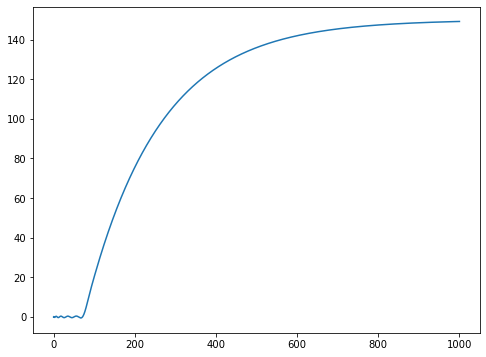

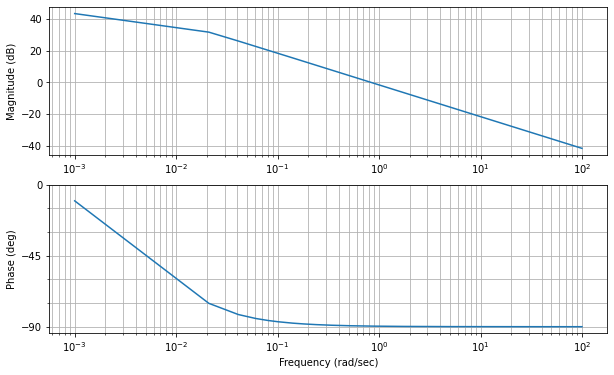

In [4]:
K = 150 #°F
tau = 180 #s
theta = 74 #s

P = K/(tau*s+1)
num_delay, den_delay = pade(theta,n=10)
G_delay = tf(num_delay,den_delay)

t = np.linspace(0,1000,2000)

y, t = step(P*G_delay,t)

plt.figure(figsize=(8,6))
plt.plot(t,y)
#plt.hlines(150*0.63,0,600)

w = np.linspace(1e-3, 1e2, 5000)
plt.figure(figsize=(10,6))
mag,phase,omega = bode(P, w, Hz=False, plot=True)

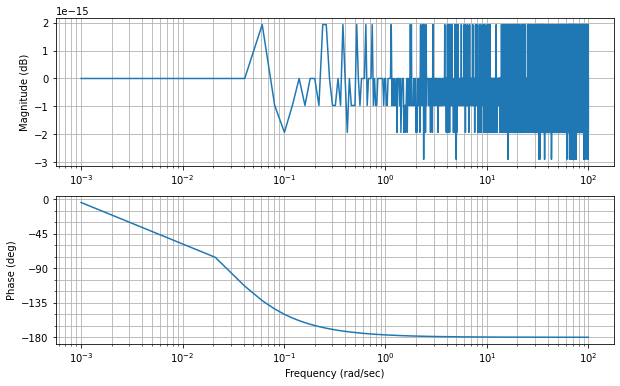

In [9]:
'''
w = np.linspace(1e-3, 1e2, 5000)
plt.figure(figsize=(10,6))
mag,phase,omega = bode(G_delay, w, Hz=False, plot=True)

'''
